C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


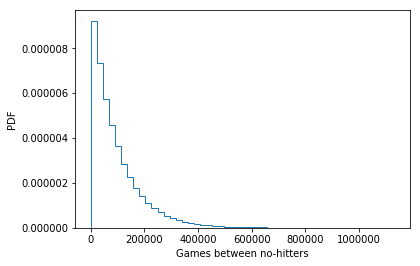

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')

nohitter_times = pd.read_csv('mlb_nohitters.csv')

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times['game_number'])

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


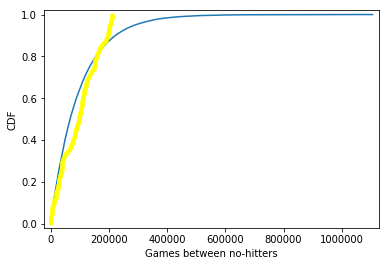

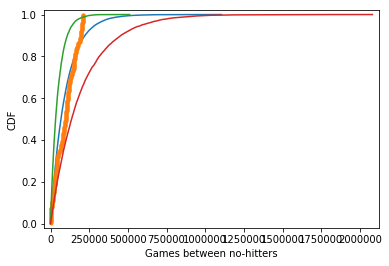

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from statsmodels.distributions.empirical_distribution import ECDF

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')

nohitter_times = pd.read_csv('mlb_nohitters.csv')
nohitter_times = nohitter_times['game_number']

tau = np.mean(nohitter_times)
inter_nohitter_time = np.random.exponential(tau, 100000)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', color='yellow', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()





#How is this parameter optimal?
#Now sample out of an exponential distribution with  being twice as large as the optimal . Do it again for  half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the  you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

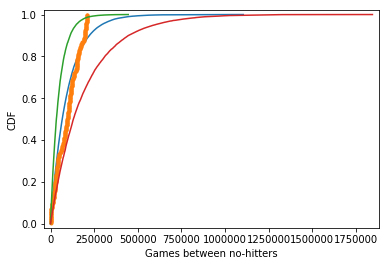

In [4]:
#How is this parameter optimal?
#Now sample out of an exponential distribution with  being twice as large as the optimal . Do it again for  half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the  you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')


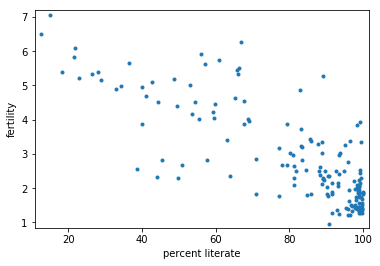

(-0.8041324026815345, 5.635092985976559e-38)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from statsmodels.distributions.empirical_distribution import ECDF
import scipy

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')

dataset = pd.read_csv('female_literacy_fertility.csv')
print(dataset.columns)
# Plot the illiteracy rate versus fertility
_ = plt.plot(dataset['female literacy'], dataset['fertility'], marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent literate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(scipy.stats.pearsonr(dataset['female literacy'], dataset['fertility']))

slope = -0.049798548090634234 children per woman / percent literac
intercept = 6.8679054196999765 children per woman


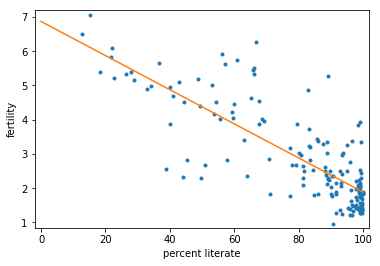

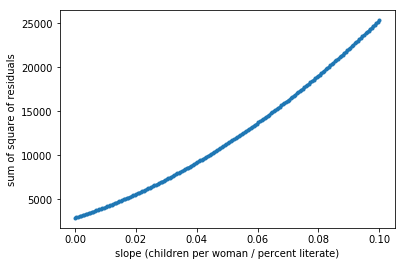

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from statsmodels.distributions.empirical_distribution import ECDF
import scipy

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')
dataset = pd.read_csv('female_literacy_fertility.csv')

literacy = dataset['female literacy']
fertility = dataset['fertility']

# Plot the illiteracy rate versus fertility
_ = plt.plot(literacy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent literate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(literacy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent literac')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()



# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * literacy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, marker='.')
plt.xlabel('slope (children per woman / percent literate)')
plt.ylabel('sum of square of residuals')

plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from statsmodels.distributions.empirical_distribution import ECDF
import scipy

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')
df = pd.read_csv('anscombe.csv')
df.reset_index(drop=True)
df.columns = [''] * len(df.columns)
df = df.iloc[:, 0:2]
x = df.iloc[:, 0]
print(x)


# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)


0        x
1     10.0
2      8.0
3     13.0
4      9.0
5     11.0
6     14.0
7      6.0
8      4.0
9     12.0
10     7.0
11     5.0
Name: , dtype: object


TypeError: can only concatenate str (not "float") to str

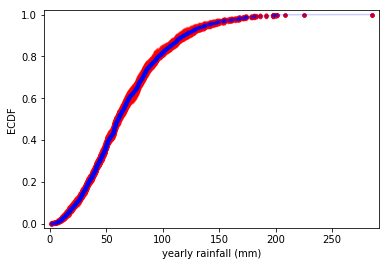

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from statsmodels.distributions.empirical_distribution import ECDF
import scipy

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')
df = pd.read_csv('sheffield_weather_station.csv', delimiter=';')
rain = df['rain']

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rain, size=len(rain))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='red', alpha=0.1)


# Compute and plot ECDF from original data
x, y = ecdf(rain)
_ = plt.plot(x, y, marker='.', color='blue', alpha = .2)

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

0.9488593574676786
0.9455698817507284


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


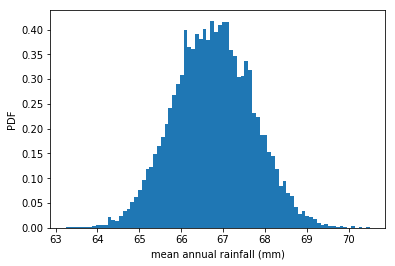

[64.9343789  68.60341292]


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


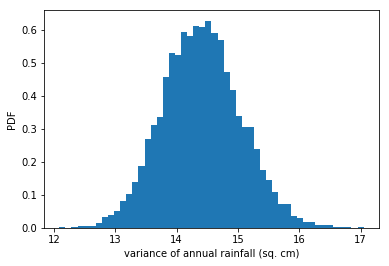

95% confidence interval = [ 89183.4662415  103967.06972789] games


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


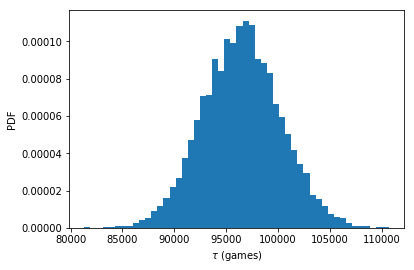

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from statsmodels.distributions.empirical_distribution import ECDF
import scipy

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')
df = pd.read_csv('sheffield_weather_station.csv', delimiter=';')
rainfall = df['rain']

def bootstrap_replicate_1d(data, func):
    """ Output the mean for a given distribution through a boostrapped sample. """
    boostrap_sample = np.random.choice(data, len(data))
    
    return func(boostrap_sample)


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates (not only the estimator)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size = 10000)

# Compute and print SEM (standard error of the mean)
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=80, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# print 2.5, 97.5 confidence interval boundaries values
print(np.percentile(bs_replicates, [2.5, 97.5]))




# Replace estimator by the variance
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size = 10000)

# Put the variance in units of square centimeters (better lisibility)
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# This is not normally distributed, as it has a longer tail to the right. 
# Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.






# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


[-0.05535127 -0.04412664]


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


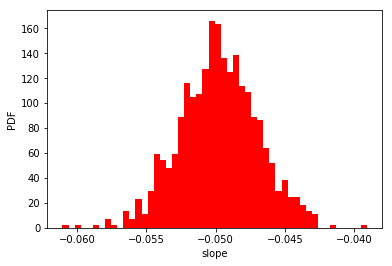

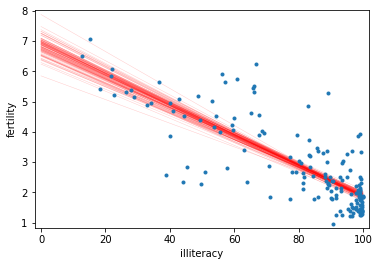

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from statsmodels.distributions.empirical_distribution import ECDF
import scipy

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')
df = pd.read_csv('sheffield_weather_station.csv', delimiter=';')
rainfall = df['rain']

def bootstrap_replicate_1d(data, func):
    """ Output the mean for a given distribution through a boostrapped sample. """
    boostrap_sample = np.random.choice(data, len(data))
    
    return func(boostrap_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates (not only the estimator)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(literacy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True, color='red')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()



# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(literacy, fertility, marker = ".", linestyle = 'none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')

plt.margins(0.02)
plt.show()

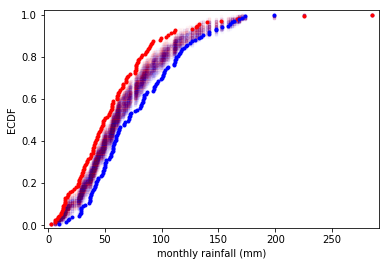

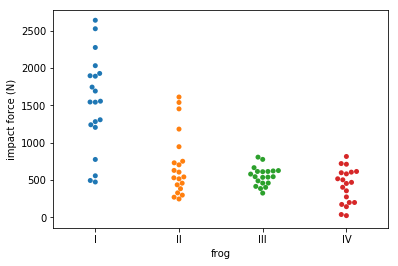

II     20
IV     20
III    20
I      20
Name: ID, dtype: int64
p-value = 0.0
p-value = 1.0
p-value = 0.0


'\nNice work! You got a similar result as when you did the permutation test. \nNonetheless, remember that it is important to carefully think about what question you want to ask. \nAre you only interested in the mean impact force, or in the distribution of impact forces?\n'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from statsmodels.distributions.empirical_distribution import ECDF
import scipy

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')
df = pd.read_csv('sheffield_weather_station.csv', delimiter=';')

rainfall_june = df[df['mm'] == 6]
rainfall_november = df[df['mm'] == 11]
rain_june = rainfall_june['rain']
rain_november = rainfall_november['rain']

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate([data1, data2])

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

# Notice that the permutation samples ECDFs overlap and give a purple haze. 
# None of the ECDFs from the permutation samples overlap with the observed data, 
# suggesting that the hypothesis is not commensurate with the data. 
# June and November rainfall are not identically distributed.



# Significance test, null hypothesis
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates





frog = pd.read_csv('frog_tongue.csv')

# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact force (mN)', data= frog )

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

#Eyeballing it, it does not look like they come from the same distribution. 
#Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. 
#However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, 
#so we should proceed with the hypothesis test.

#The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. 
#It is possible the frogs strike with the same force and this observed difference was by chance. 
#You will compute the probability of getting at least a 0.29 N difference in mean strike force under
#the hypothesis that the distributions of strike forces for the two frogs are identical. 
#We use a permutation test with a test statistic of the difference of means to test this hypothesis.

print(frog['ID'].value_counts())
force_a = frog[frog['ID']=='I']
force_a = force_a['impact force (mN)']
force_b = frog[frog['ID']=='II']
force_b = force_b['impact force (mN)']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >=empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

#The p-value tells you that there is about a 0.6% chance that you would get the difference
#of means observed in the experiment if frogs were exactly the same. 
#A p-value below 0.01 is typically said to be "statistically significant," but: 
#    warning! warning! warning! You have computed a p-value; it is a number. 
#    I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both
#    said to be "statistically significant," but they are definitely not the same!


"""
A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. 
Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. 
Because you don't have the original data, you cannot do a permutation test, 
and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. 
You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.
To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, 
your goal is to calculate the probability of getting a mean impact force less than or equal to what
was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that
of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. 
This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each
measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.
"""
def bootstrap_replicate_1d(data, func):
    """ Output the mean for a given distribution through a boostrapped sample. """
    boostrap_sample = np.random.choice(data, len(data))
    
    return func(boostrap_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates (not only the estimator)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p-value =', p)

# The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.





"""
A two-sample bootstrap hypothesis test for difference of means
We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, 
but not necessarily the same distribution, which is also impossible with a permutation test.
To do the two-sample bootstrap test, we shift both arrays to have the same mean, 
since we are simulating the hypothesis that their means are, in fact, equal. 
We then draw bootstrap samples out of the shifted arrays and compute the difference in means. 
This constitutes a bootstrap replicate, and we generate many of them. 
The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.
The objects forces_concat and empirical_diff_means are already in your namespace.
"""
forces_concat = frog['impact force (mN)']
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

"""
Nice work! You got a similar result as when you did the permutation test. 
Nonetheless, remember that it is important to carefully think about what question you want to ask. 
Are you only interested in the mean impact force, or in the distribution of impact forces?
"""


In [12]:
"""
Statistical test is all about what we want to verify :
Identifiez votre application : est-ce que vous voulez savoir si vos variables sont corrélées ? 
Ou savoir si les groupes d’individus dans votre expérience sont vraiment différents ? 
Ou encore savoir quelle variable influence les résultats plus que l’autres ?

Ensuite, les distributions à tester sont-elles catégoriques ? numériques ?
"""
import numpy as np
import pandas as pd


# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate([data1, data2])

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)


"""
This small p-value suggests that party identity had a lot to do with the voting. 
Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.
"""

"""
Which of the following situations involving testing by a web-based company has an equivalent 
set up for an A/B test as the one you just did with the Civil Rights Act of 1964?
"""


p-value = 0.0001


'\nWhich of the following situations involving testing by a web-based company has an equivalent \nset up for an A/B test as the one you just did with the Civil Rights Act of 1964?\n'

In [13]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means,10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

"""
Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as 
extreme as the actual difference between the dead ball and live ball eras. 
This suggests strong statistical significance. Watch out, though, you could very well 
have gotten zero replicates that were as extreme as the observed value. 
This just means that the p-value is quite small, almost certainly smaller than 0.001.
"""

NameError: name 'nht_dead' is not defined

In [14]:
"""
The observed correlation between female illiteracy and fertility in the data set of 162 countries 
may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. 
You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. 
Of the following choices, which is the best way to do it?

Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to
generate a new set of (illiteracy, fertility) data.
this exactly simulates the null hypothesis and does so more efficiently than the last option. 
It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs
to which fertility value is shuffled.
"""
import pandas as pd
import numpy as np
import os, sys

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')
dataset = pd.read_csv('female_literacy_fertility.csv')

literacy = dataset['female literacy']
fertility = dataset['fertility']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(literacy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(20000)

# Draw replicates
for i in range(0, 20000):
    # Permute illiteracy measurments: illiteracy_permuted
    literacy_permuted = np.random.permutation(literacy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(literacy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

"""
/!\ Reversed variables for example : true p-value = 0.0000
You got a p-value of zero. In hacker statistics, this means that your p-value is very low, 
since you never got a single replicate in the 10,000 you took that had a Pearson correlation 
greater than the observed one. You could try increasing the number of replicates you take to 
continue to move the upper bound on your p-value lower and lower.
"""

p-val = 1.0


'\n/!\\ Reversed variables for example : true p-value = 0.0000\nYou got a p-value of zero. In hacker statistics, this means that your p-value is very low, \nsince you never got a single replicate in the 10,000 you took that had a Pearson correlation \ngreater than the observed one. You could try increasing the number of replicates you take to \ncontinue to move the upper bound on your p-value lower and lower.\n'

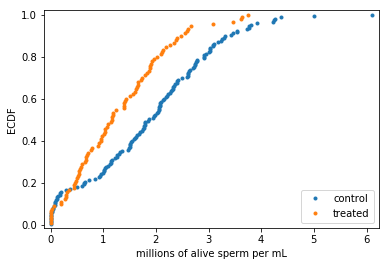

p-value = 0.0001


'\nNice work! The p-value is small, most likely less than 0.0001, since you never saw a bootstrap \nreplicated with a difference of means at least as extreme as what was observed. In fact, when I \ndid the calculation with 10 million replicates, I got a p-value of 2e-05.\n'

In [15]:
"""
Do neonicotinoid insecticides have unintended consequences?
As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, 
you will investigate the effects of neonicotinoid insecticides on bee reproduction. 
These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids 
on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment 
affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees 
(stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).
"""

import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')
df = pd.read_csv('bee_sperm.csv')

control = df[df['Treatment'] == 'Control']
treated = df[df['Treatment'] == 'Pesticide']

control = control['Alive Sperm Millions']
treated = treated['Alive Sperm Millions']


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the marginsa
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()



"""
Bootstrap hypothesis test on bee sperm counts
Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid 
insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. 
You will use the difference of means as your test statistic.

For your reference, the call signature for the draw_bs_reps() function you wrote in chapter 2 is 
draw_bs_reps(data, func, size=1).
"""

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def bootstrap_replicate_1d(data, func):
    """ Output the mean for a given distribution through a boostrapped sample. """
    boostrap_sample = np.random.choice(data, len(data))
    
    return func(boostrap_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates (not only the estimator)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control, treated)

# Compute mean of pooled data: mean_count
mean_count = np.concatenate([control, treated]).mean()

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)

print('p-value =', p)

"""
Nice work! The p-value is small, most likely less than 0.0001, since you never saw a bootstrap 
replicated with a difference of means at least as extreme as what was observed. In fact, when I 
did the calculation with 10 million replicates, I got a p-value of 2e-05.
"""


   band species  beak_length  beak_depth  year
0     2  fortis          9.4         8.0  1975
1     9  fortis          9.2         8.3  1975
2    12  fortis          9.5         7.5  1975
3    15  fortis          9.5         8.0  1975
4   305  fortis         11.5         9.9  1975


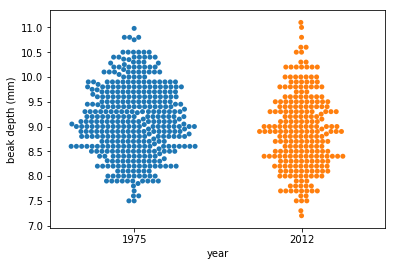

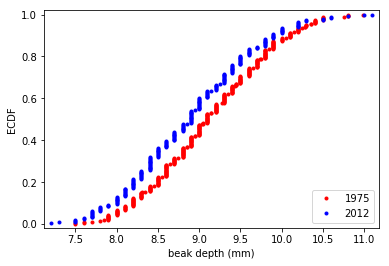

difference of means = 0.22313275434242108 mm
95% confidence interval = [-0.33939578 -0.10816106] mm
p = 0.0


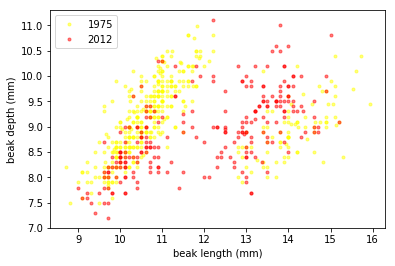

1975: slope = 0.0945968320892116 conf int = [0.05500088 0.13486652]
1975: intercept = 8.053907980716424 conf int = [7.58387362 8.50865659]
2012: slope = 0.27942148396112504 conf int = [0.23508067 0.31727908]
2012: intercept = 5.548559204612315 conf int = [5.10380598 6.07401118]


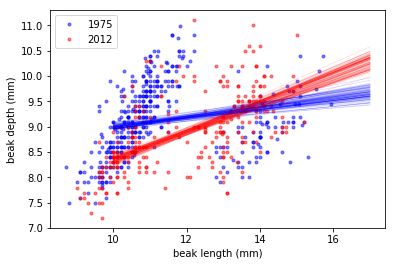

1975: mean ratio = 1.2461609991094325 conf int = [1.22372193 1.27035091]
2012: mean ratio = 1.3483617710027846 conf int = [1.32467353 1.37280547]


'\nIn the previous exercise, you computed the mean beak length to depth ratio with 99% confidence intervals \nfor 1975 and for 2012. The results of that calculation are shown graphically in the plot accompanying this problem. \nIn addition to these results, what would you say about the ratio of beak length to depth?\n\nIt is impossible to say if this is a real effect or just due to noise without computing a p-value. \nLet me compute the p-value and get back to you.\n'

In [13]:
import pandas as pd
import numpy as np
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Statistical Thinking with Python (2)/')

df_one = pd.read_csv('finch_beaks_1975.csv')
df_two = pd.read_csv('finch_beaks_2012.csv')

cols = ['band', 'species','beak_length', 'beak_depth']
df_two.columns = cols
df_one.columns = cols

df_one['year'] = '1975'
df_two['year'] = '2012'

frames = [df_one, df_two]
df = pd.concat(frames)
print(df.head())

# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

"""
It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. 
Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, 
and it might have a bigger variance.

While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. 
Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.
"""

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

bd_1975 = df_one['beak_depth']
bd_2012 = df_two['beak_depth']

# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, color="red", marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, color="blue", marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

"""
The differences are much clearer in the ECDF. 
The mean is larger in the 2012 data, and the variance does appear larger as well.

Parameter estimates of beak depths
Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012
and report a 95% confidence interval.
"""
def bootstrap_replicate_1d(data, func):
    """ Output the mean for a given distribution through a boostrapped sample. """
    boostrap_sample = np.random.choice(data, len(data))
    
    return func(boostrap_sample)

def diff_of_means(data1, data2):
    
    diff = np.mean(data1) - np.mean(data2)
    
    return diff

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates (not only the estimator)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


# Compute the difference of the sample means: mean_diff
mean_diff = diff_of_means(bd_1975, bd_2012)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')


"""
Hypothesis test: Are beaks deeper in 2012?
Your plot of the ECDF and determination of the confidence interval make it pretty clear 
that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that 
this effect is just due to random chance? In other words, what is the probability that we 
would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. 
For that we could use a permutation test. The hypothesis is that the means are equal. 
To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and
then use bootstrap sampling to compute the difference of means.
"""

# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)




"""
We get a p-value of 0.0034, which suggests that there is a statistically significant difference. 
But remember: it is very important to know how different they are! In the previous exercise, 
you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. 
Changing by 0.2 mm in 37 years is substantial by evolutionary standards. 
If it kept changing at that rate, the beak depth would double in only 400 years.

"""

bl_1975 = df_one['beak_length']
bl_2012 = df_two['beak_length']

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='yellow', alpha=.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color="red", alpha=.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

"""
In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), 
but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. 
So, it does not look like the beaks kept the same shape; they became shorter and deeper

Now let's say we want to see/compare the evolution of 2 distributions in the same time, let's say if they evolve towards
the same dimension or not.
"""

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps



# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

# It looks like they have the same slope, but different intercepts.

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()



"""
The linear regressions showed interesting information about the beak geometry. 
The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, 
the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape 
of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.
"""

# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


"""
In the previous exercise, you computed the mean beak length to depth ratio with 99% confidence intervals 
for 1975 and for 2012. The results of that calculation are shown graphically in the plot accompanying this problem. 
In addition to these results, what would you say about the ratio of beak length to depth?

It is impossible to say if this is a real effect or just due to noise without computing a p-value. 
Let me compute the p-value and get back to you.
"""


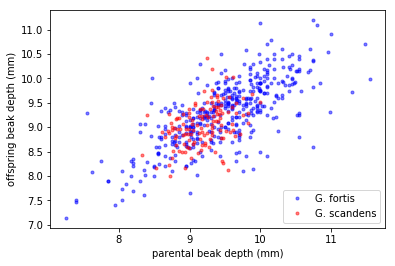

G. scandens: 0.4117063629401258 [0.26514825 0.53021634]
G. fortis: 0.7283412395518487 [0.6710712  0.77780497]
G. scandens: 0.5485340868685982 [0.35614013 0.75023704]
G. fortis: 0.7229051911438156 [0.64494431 0.79685283]
p-val = 0.0


'\nYou get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew\nhad a heritability high enough to match that which was observed. This strongly suggests that beak depth\nis heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of\nthe heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.\n'

In [72]:
"""
EDA of heritability
The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. 
The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. 
The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) 
for both species. Use the alpha=0.5 keyword argument to help you see overlapping points.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fortis = pd.read_csv('fortis_beak_depth_heredity.csv')
scandens = pd.read_csv('scandens_beak_depth_heredity.csv')
df_one = pd.read_csv('finch_beaks_1975.csv')
df_two = pd.read_csv('finch_beaks_2012.csv')

cols = ['band', 'species','beak_length', 'beak_depth']
df_two.columns = cols
df_one.columns = cols

df_one['year'] = '1975'
df_two['year'] = '2012'

frames = [df_one, df_two]
df = pd.concat(frames)

fortis['specie'] = 'fortis'
scandens['specie'] = 'scandens'

col = ['mid_parent','Mid-offspr','specie']
fortis['mid_parent'] = fortis.iloc[:, [1,2]].mean(axis=1)

fortis = fortis[col]
fortis.rename(columns={"Mid-offspr": "mid_offspring"}, inplace = True)

bd_parent_fortis = fortis['mid_parent']
bd_offspring_fortis = fortis['mid_offspring']

bd_parent_scandens = scandens['mid_parent']
bd_offspring_scandens = scandens['mid_offspring']

# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker=".", linestyle='none', color='blue', alpha=.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker=".", linestyle='none', color='red', alpha=.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

"""
It appears as though there is a stronger correlation in G. fortis than in G. scandens. 
This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics,
such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, 
we need to do a pairs bootstrap.
"""

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates


"""
Pearson correlation of offspring and parental data
The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents
are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring
beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise
to compute a 95% confidence interval using pairs bootstrap.
"""

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r,1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r,1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, q=[2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, q=[2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

"""
It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is
more strongly correlated with their offspring than their G. scandens counterparts.


Measuring heritability
Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean
of the variances of the two data sets. This is a measure of the correlation between parents and offspring,
but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability
as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise,
you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general)
is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer
with your data and analyze them appropriately. If you are interested in how heritable traits are, 
the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson
correlation coefficient.
"""


def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile( replicates_scandens, q=[2.5,97.5])
conf_int_fortis = np.percentile( replicates_fortis, q=[2.5,97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

"""
Here again, we see that G. fortis has stronger heritability than G. scandens. 
This suggests that the traits of G. fortis may be strongly incorporated into 
G. scandens by introgressive hybridization. (???)


Is beak depth heritable at all in G. scandens?
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability
was just achieved by chance and beak depth is actually not really heritable in the species. 
You will test that hypothesis here. To do this, you will do a pairs permutation test.
"""

# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

"""
You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew
had a heritability high enough to match that which was observed. This strongly suggests that beak depth
is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of
the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.
"""



